In [2]:
%cd ..
%clear
from motion_planner import MotionPlanner, Trajectory, RobotModel, CONS_MARGINS
import numpy as np, matplotlib.pyplot as plt

/home/stephen/Desktop/LASA/epfl-lasa/mpc_motion_planner


### Create your motion planner

In [3]:
planner = MotionPlanner(RobotModel.Panda)

### Set boundary conditions

In [4]:
# Initial state, for instance :
qlim =planner._robot_utils.X_limits
qdotlim = planner._robot_utils.V_limits
x0 = planner.sample_state(set_qddot_to_zero=False, use_margins=True)
xd = planner.sample_state(set_qddot_to_zero=False, use_margins=True)

planner.set_current_state(x0)
planner.set_target_state(xd)

In [4]:
planner.forward_kinematics(x0[0])

(array([-0.32990743, -0.28698071,  0.59221245]),
 array([[ 0.19497551, -0.89904788, -0.39204268],
        [-0.48030068,  0.26098709, -0.83737507],
        [ 0.85515835,  0.351566  , -0.38092721]]))

In [17]:
xd[-1],  np.sqrt(2 * CONS_MARGINS[-1] * planner._robot_utils.J_limits * np.max([np.abs(CONS_MARGINS[1]*qdotlim[:, 1]-xd[1]), np.abs(CONS_MARGINS[1]*qdotlim[:, 0]-xd[1])], axis=0))

(array([ 2.21461924,  2.24843519, -2.45958836,  3.93974684,  4.71101367,
         3.351017  ,  6.93388114]),
 array([66.93915854, 44.87646911, 45.23305672, 49.5537836 , 70.13383045,
        74.61259586, 76.0542132 ]))

### Solve and get trajectory

In [5]:
planner.solve(ruckig=False) # You can specify other parameters such as line_search_max_iter

{'status': 1, 'iter': 3, 'time_to_solve': 0.06361913681030273}

In [15]:
pos.shape

(3,)

In [16]:
rot.shape

(3, 3)

In [21]:
pos, rot = planner.forward_kinematics(traj_ruckig.q[0])

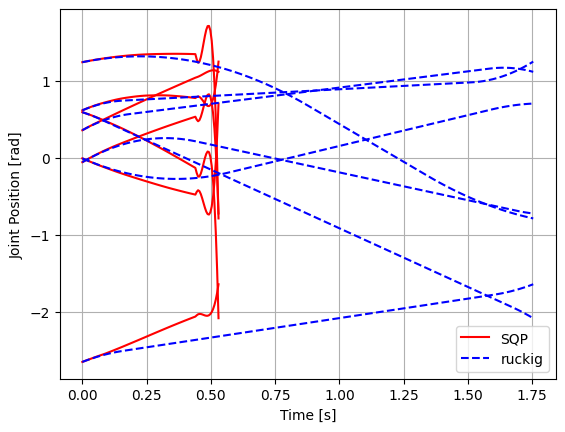

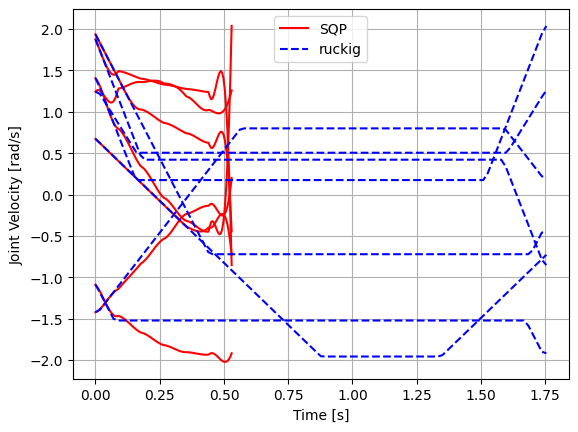

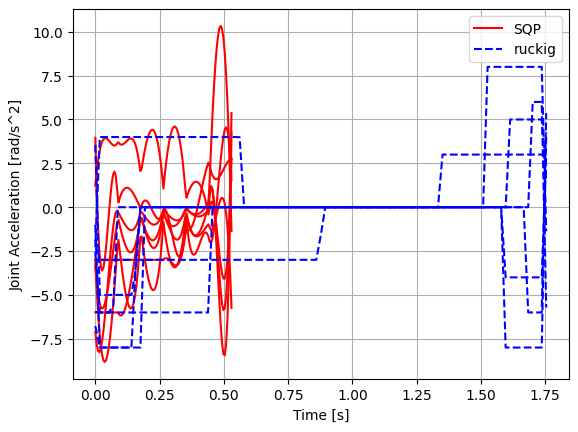

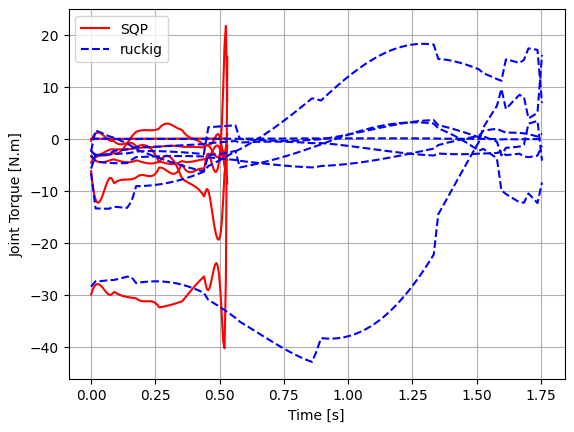

In [6]:
traj = planner.get_trajectory()
traj_ruckig = planner.get_trajectory(ruckig=True)

# print("SQP CONSTRAINTS SATISFIED : " + str("q : {} ({}) | " + 
#       "qdot : {} ({}) | " + 
#       "qddot : {} ({}) | " +
#       "tau : {} ({}) ").format(bool(traj.q_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj.q_cons_satisfied[1])) if np.sum(traj.q_cons_satisfied[1]) else None, 
#                           bool(traj.qdot_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj.qdot_cons_satisfied[1])) if np.sum(traj.qdot_cons_satisfied[1]) else None, 
#                           bool(traj.qddot_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj.qddot_cons_satisfied[1])) if np.sum(traj.qddot_cons_satisfied[1]) else None,
#                           bool(traj.tau_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj.tau_cons_satisfied[1])) if np.sum(traj.tau_cons_satisfied[1]) else None
#                           ))

# print("RUCKIG CONSTRAINTS SATISFIED: " + str("q : {} ({}) | " + 
#       "qdot : {} ({}) | " + 
#       "qddot : {} ({}) | " +
#       "tau : {} ({}) ").format(bool(traj_ruckig.q_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj_ruckig.q_cons_satisfied[1])) if np.sum(traj_ruckig.q_cons_satisfied[1]) else None,
#                           bool(traj_ruckig.qdot_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj_ruckig.qdot_cons_satisfied[1])) if np.sum(traj_ruckig.qdot_cons_satisfied[1]) else None,
#                           bool(traj_ruckig.qddot_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj_ruckig.qddot_cons_satisfied[1])) if np.sum(traj_ruckig.qddot_cons_satisfied[1]) else None,
#                           bool(traj_ruckig.tau_cons_satisfied[0]), list( cons_i.item() for cons_i in np.where(traj_ruckig.tau_cons_satisfied[1])) if np.sum(traj_ruckig.tau_cons_satisfied[1]) else None
#                           ))

plt.figure()
plt.plot(traj.t[0], traj.q[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.q[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Position [rad]")
plt.legend()

plt.figure()
plt.plot(traj.t[0], traj.qdot[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.qdot[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Velocity [rad/s]")
plt.legend()

plt.figure()
plt.plot(traj.t[0], traj.qddot[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.qddot[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Acceleration [rad/s^2]")
plt.legend()

plt.figure()
plt.plot(traj.t[0], traj.tau[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.tau[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Torque [N.m]")
plt.legend()

In [48]:
traj_ruckig.qddot[0, 0], xd[2]

(array([0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0.]))

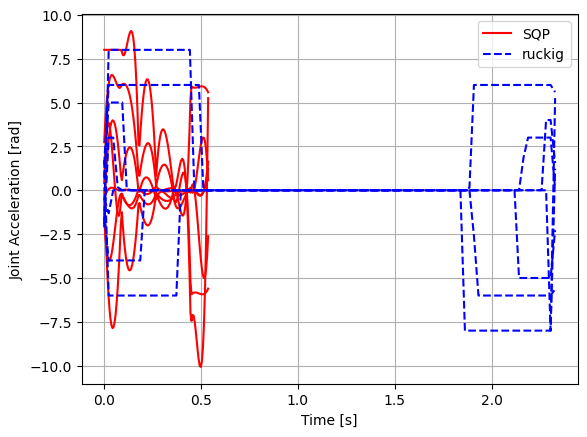

In [7]:
plt.figure()
plt.plot(traj.t[0], traj.qddot[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.qddot[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Acceleration [rad]")
plt.legend()

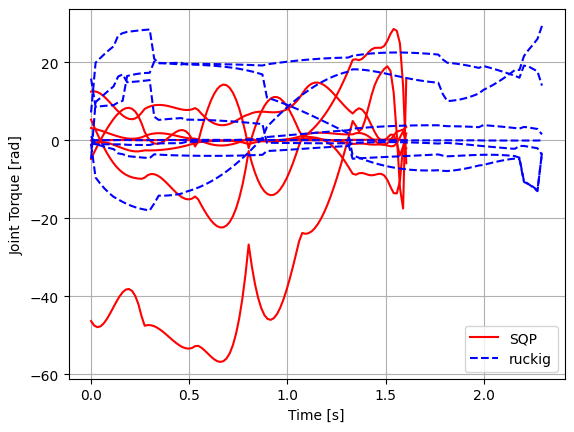

In [39]:
plt.figure()
plt.plot(traj.t[0], traj.tau[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.tau[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Torque [rad]")
plt.legend()

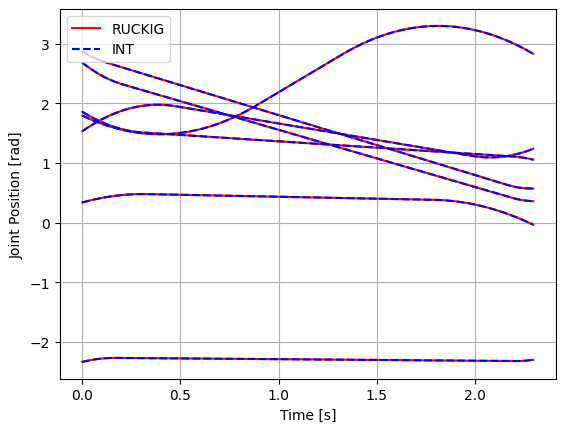

In [40]:
q_int = traj_ruckig._get_numerical_integral_of("qdot", traj_ruckig.q[:, 0, :])
plt.figure()
plt.plot(traj_ruckig.t[0], traj_ruckig.q[0], 'r', label=['RUCKIG', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], q_int[0], '--b', label=['INT', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Position [rad]")
plt.legend()

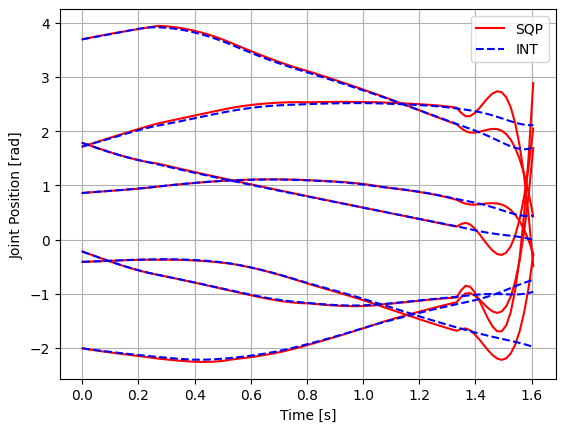

In [41]:
q_int = traj._get_numerical_integral_of("qdot", traj.q[:, 0, :])
plt.figure()
plt.plot(traj.t[0], traj.q[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj.t[0], q_int[0], '--b', label=['INT', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Position [rad]")
plt.legend()

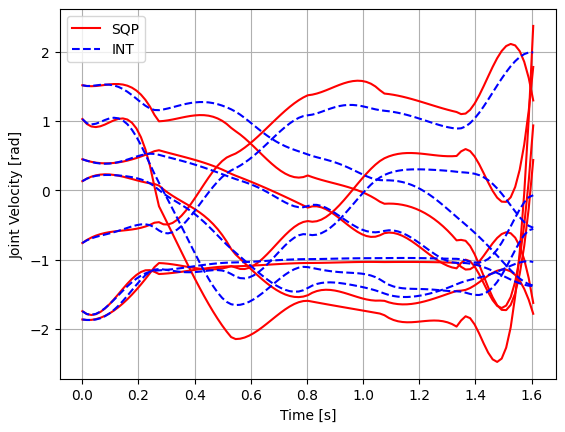

In [42]:
qdot_int = traj._get_numerical_integral_of("qddot", traj.qdot[:, 0, :])
plt.figure()
plt.plot(traj.t[0], traj.qdot[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj.t[0], qdot_int[0], '--b', label=['INT', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Velocity [rad]")
plt.legend()

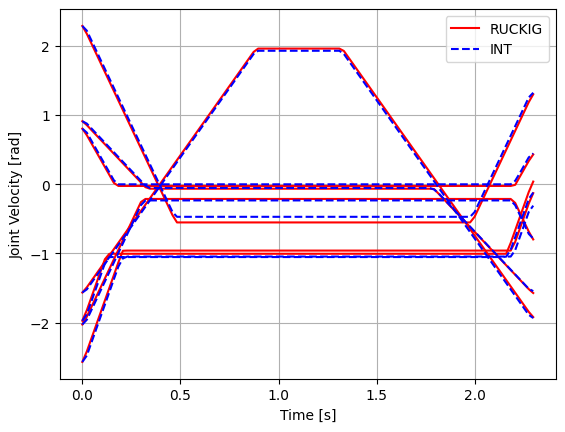

In [43]:
qdot_int = traj_ruckig._get_numerical_integral_of("qddot", traj_ruckig.qdot[:, 0, :])
plt.figure()
plt.plot(traj_ruckig.t[0], traj_ruckig.qdot[0], 'r', label=['RUCKIG', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], qdot_int[0], '--b', label=['INT', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Velocity [rad]")
plt.legend()

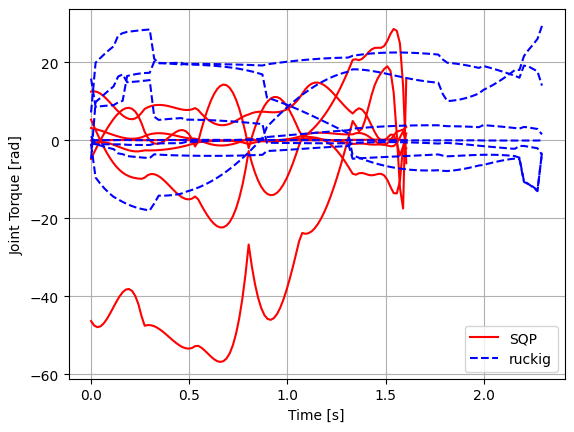

In [45]:
plt.figure()
plt.plot(traj.t[0], traj.tau[0], 'r', label=['SQP', None, None, None, None, None, None])
plt.plot(traj_ruckig.t[0], traj_ruckig.tau[0], '--b', label=['ruckig', None, None, None, None, None, None])
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Joint Torque [rad]")
plt.legend()

In [46]:
traj_ruckig.t[0, -1], traj.t[0, -1]

(2.2969894011929015, 1.6055971589545908)

If you have several trajectories to compute, you can concatenate these by using the "+" operator :

In [47]:
print("Shape of traj is initially : {} ({} trajectory of {} time-steps)".format(traj.shape, *traj.shape))
traj2 = planner.get_trajectory()
traj += traj2
print("After using the + operator traj has now shape : {} ({} trajectories of {} time-steps each)".format(traj.shape, *traj.shape))

Shape of traj is initially : (1, 101) (1 trajectory of 101 time-steps)
After using the + operator traj has now shape : (2, 101) (2 trajectories of 101 time-steps each)


### Accessing t, q, qdot, qddot and tau
To access the results, you can use one of these notations:

In [48]:
t = traj["t"]
q = traj.q
qdot = traj["qdot"][0] # If you want to access the first q trajectory
t, q, qdot, qddot, tau = traj[1] # If you want to get all the state from the second trajectory at once

# 
# etc ..
#

print(t.shape, q.shape, qdot.shape, qddot.shape, tau.shape)

(101,) (101, 7) (101, 7) (101, 7) (101, 7)


### Trajectory analysis
The .get_trajectory() method returns a Trajectory object that provides several useful analysis methods. To check if the trajectories satasfy all the constraints: 

In [49]:
print("Constraint satisfied : {}".format(traj.all_cons_satisfied))

Constraint satisfied : [False False]


the .all_cons_satisfied attribute **returns one boolean per trajectory stored!** You can also assess each constraint separately by accessing the attributes :
- .q_cons_satisfied
- .qdot_cons_satisfied
- .qddot_cons_satisfied
- .tau_cons_satisfied

### Compute Power
You can access the total power of a trajectory by using the property .power.

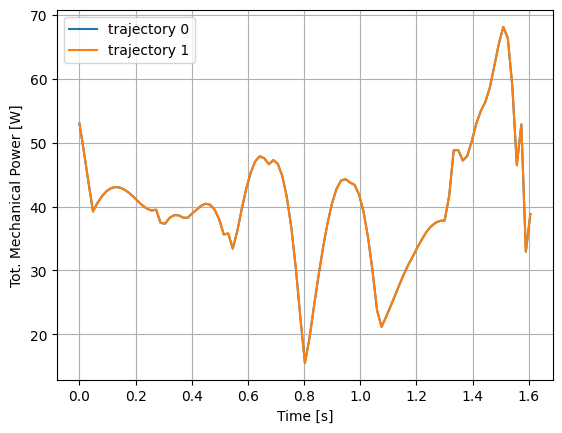

In [50]:
plt.figure()
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Tot. Mechanical Power [W]")
for i in range(len(traj)):
    plt.plot(traj.t[i], traj.power[i], label="trajectory {}".format(i))
plt.legend()

In [51]:
traj.t

array([[0.        , 0.01605597, 0.03211194, 0.04816791, 0.06422389,
        0.08027986, 0.09633583, 0.1123918 , 0.12844777, 0.14450374,
        0.16055972, 0.17661569, 0.19267166, 0.20872763, 0.2247836 ,
        0.24083957, 0.25689555, 0.27295152, 0.28900749, 0.30506346,
        0.32111943, 0.3371754 , 0.35323137, 0.36928735, 0.38534332,
        0.40139929, 0.41745526, 0.43351123, 0.4495672 , 0.46562318,
        0.48167915, 0.49773512, 0.51379109, 0.52984706, 0.54590303,
        0.56195901, 0.57801498, 0.59407095, 0.61012692, 0.62618289,
        0.64223886, 0.65829484, 0.67435081, 0.69040678, 0.70646275,
        0.72251872, 0.73857469, 0.75463066, 0.77068664, 0.78674261,
        0.80279858, 0.81885455, 0.83491052, 0.85096649, 0.86702247,
        0.88307844, 0.89913441, 0.91519038, 0.93124635, 0.94730232,
        0.9633583 , 0.97941427, 0.99547024, 1.01152621, 1.02758218,
        1.04363815, 1.05969412, 1.0757501 , 1.09180607, 1.10786204,
        1.12391801, 1.13997398, 1.15602995, 1.17

# PINOCCHIO TEST

In [7]:
import pinocchio as pnc
import numpy as np
import time

In [8]:
model = pnc.buildModelFromUrdf(planner._robot_utils.MPC_ROBOT_URDF_PATH)
data = model.createData()

In [9]:
def forward_kinematics(model, data, q):
    ee_pos_pnc = np.ndarray(shape=(q.shape[0], 3))
    ee_pos_polympc = np.ndarray(shape=(q.shape[0], 3))
    ee_rot_pnc = np.ndarray(shape=(q.shape[0], 3, 3))
    ee_rot_polympc = np.ndarray(shape=(q.shape[0], 3, 3))
    for i, qi in enumerate(q):
        pnc.framesForwardKinematics(model, data, qi)
        pnc.updateFramePlacements(model, data)
        ee_pos_pnc[i] = data.oMf[20].translation
        ee_rot_pnc[i] = data.oMf[20].rotation
        ee_pos_polympc[i], ee_rot_polympc[i] = planner._motion_planner.forward_kinematics(qi)

    return ee_pos_pnc, ee_rot_pnc, ee_pos_polympc, ee_rot_polympc

In [25]:
pnc.computeFrameJacobian(model, data, traj_ruckig.q[0, 0], 20).shape

(6, 7)

In [11]:
def forward_velocity(model, data, q, qdot):
    ee_vel_pnc = np.ndarray(shape=(q.shape[0], 3))
    ee_vel_polympc = np.ndarray(shape=(q.shape[0], 3))
    for i, (qi, qdoti) in enumerate(zip(q, qdot)):
        pnc.computeJointJacobians(model, data, qi)
        Jj = pnc.getJointJacobian(model, data, model.frames[20].parent, pnc.WORLD)
        ee_vel_pnc[i] = Jj[0:3] @ qdoti 
        #print(Ji)
        ee_vel_polympc[i] = planner._motion_planner.forward_velocities(qi, qdoti)[0:3]
    
    return ee_vel_pnc, ee_vel_polympc

In [17]:
def inverse_kinematics(ee_pos, ee_rot):
    q_pnc = np.ndarray(shape=(ee_pos.shape[0], 7))
    q_polympc = np.ndarray(shape=(ee_pos.shape[0], 7))
    for i, (ee_pos_i, ee_rot_i) in enumerate(zip(ee_pos, ee_rot)):
        q_polympc[i] = planner._motion_planner.inverse_kinematics(ee_rot_i, ee_pos_i)

    return q_polympc

In [13]:
ee_vel_pnc, ee_vel_polympc = forward_velocity(model, data, traj_ruckig.q[0], traj_ruckig.qdot[0])

In [9]:
ee_pos_pnc, ee_rot_pnc, ee_pos_polympc, ee_rot_polympc = forward_kinematics(model, data, traj_ruckig.q[0])

ax = plt.figure().add_subplot(projection='3d')
ax.plot(ee_pos_pnc[:, 0], ee_pos_pnc[:, 1], zs= ee_pos_pnc[:, 2], label=['PNC'])
ax.plot(ee_pos_polympc[:, 0], ee_pos_polympc[:, 1], '--', zs= ee_pos_polympc[:, 2], label=['POLYMPC'])
#ax.quiver3D(ee_pos_pnc[:, 0], ee_pos_pnc[:, 1], ee_pos_pnc[:, 2], ee_vel_pnc[:, 0], ee_vel_pnc[:, 1], ee_vel_pnc[:, 2], length=0.05, normalize=True)
#ax.quiver3D(ee_pos_pnc[:, 0], ee_pos_pnc[:, 1], ee_pos_pnc[:, 2], ee_vel_polympc[:, 0], ee_vel_polympc[:, 1], ee_vel_polympc[:, 2], length=0.05, normalize=True)
ax.view_init(elev=20, azim=-65, roll=0)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.legend()
plt.show()

NameError: name 'forward_kinematics' is not defined

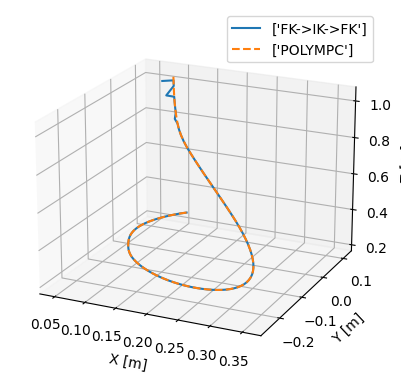

In [8]:
#ee_ik = inverse_kinematics(pos, rot)
pos, rot = planner.forward_kinematics(traj_ruckig.q[0])
ee_ik = planner.inverse_kinematics(pos, rot)
ee_pos_polympc_after_ik, _ = planner.forward_kinematics(ee_ik)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(ee_pos_polympc_after_ik[:, 0], ee_pos_polympc_after_ik[:, 1], zs= ee_pos_polympc_after_ik[:, 2], label=['FK->IK->FK'])
ax.plot(pos[:, 0], pos[:, 1], '--', zs= pos[:, 2], label=['POLYMPC'])
#ax.quiver3D(ee_pos_pnc[:, 0], ee_pos_pnc[:, 1], ee_pos_pnc[:, 2], ee_vel_pnc[:, 0], ee_vel_pnc[:, 1], ee_vel_pnc[:, 2], length=0.05, normalize=True)
#ax.quiver3D(ee_pos_pnc[:, 0], ee_pos_pnc[:, 1], ee_pos_pnc[:, 2], ee_vel_polympc[:, 0], ee_vel_polympc[:, 1], ee_vel_polympc[:, 2], length=0.05, normalize=True)
ax.view_init(elev=20, azim=-65, roll=0)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.legend()
plt.show()

In [63]:
#planner._motion_planner.forward_kinematics(traj_ruckig.q[0])

TypeError: forward_kinematics(): incompatible function arguments. The following argument types are supported:
    1. (self: motion_planning_lib.PandaMotionPlanner, arg0: numpy.ndarray[numpy.float64[7, 1]]) -> numpy.ndarray[numpy.float64[3, 1]]
    2. (self: motion_planning_lib.PandaMotionPlanner, arg0: numpy.ndarray[numpy.float64[7, 1]], arg1: str) -> numpy.ndarray[numpy.float64[3, 1]]

Invoked with: <motion_planning_lib.PandaMotionPlanner object at 0x7f0c41560630>, array([[-1.40755114,  0.98380906, -1.11931502, -2.30089597,  0.74885459,
         0.36208525, -1.63816726],
       [-1.43161366,  0.982031  , -1.11743485, -2.2872732 ,  0.80092312,
         0.35341465, -1.69524905],
       [-1.45191811,  0.97830432, -1.11288904, -2.27697011,  0.84899141,
         0.34974311, -1.74702924],
       [-1.46822183,  0.97257727, -1.10567606, -2.27000097,  0.89305896,
         0.35140589, -1.79347512],
       [-1.4805248 ,  0.96484985, -1.09579592, -2.26636578,  0.93312577,
         0.35840298, -1.83458668],
       [-1.48882704,  0.95512206, -1.08324863, -2.26606453,  0.96919185,
         0.3707344 , -1.87036392],
       [-1.49312853,  0.9433939 , -1.06803417, -2.26909724,  1.00125718,
         0.38840014, -1.90080685],
       [-1.49342929,  0.92966537, -1.05015256, -2.27546389,  1.02932178,
         0.41132301, -1.92591545],
       [-1.48972931,  0.91395166, -1.02960379, -2.28460479,  1.05338564,
         0.4362183 , -1.94568974],
       [-1.4820286 ,  0.89739636, -1.00638785, -2.29406365,  1.07344876,
         0.46111359, -1.96012971],
       [-1.47053588,  0.88084071, -0.98050476, -2.30352252,  1.08951114,
         0.48600888, -1.96923536],
       [-1.45807592,  0.86428507, -0.95195451, -2.31298138,  1.10157278,
         0.51090417, -1.97300748],
       [-1.44561596,  0.84772943, -0.9207371 , -2.32244025,  1.10963368,
         0.53579947, -1.97367396],
       [-1.43315599,  0.83117379, -0.88685253, -2.33189911,  1.11369385,
         0.56069476, -1.97429831],
       [-1.42069603,  0.81461815, -0.85030081, -2.34135798,  1.11375327,
         0.58559005, -1.97492267],
       [-1.40823607,  0.79806251, -0.81108192, -2.35081684,  1.10981196,
         0.61048535, -1.97554702],
       [-1.3957761 ,  0.78150687, -0.76960759, -2.36027571,  1.10186991,
         0.63538064, -1.97617137],
       [-1.38331614,  0.76495122, -0.72785061, -2.36973457,  1.08992712,
         0.66027593, -1.97679572],
       [-1.37085618,  0.74839558, -0.68609362, -2.37919344,  1.07398359,
         0.68517122, -1.97742008],
       [-1.35839622,  0.73183994, -0.64433664, -2.3886523 ,  1.05403933,
         0.71006652, -1.97804443],
       [-1.34593625,  0.7152843 , -0.60257966, -2.39811117,  1.03009432,
         0.73496181, -1.97866878],
       [-1.33347629,  0.69872866, -0.56082267, -2.40757003,  1.00214858,
         0.7598571 , -1.97929313],
       [-1.32101633,  0.68217302, -0.51906569, -2.4170289 ,  0.97020209,
         0.7847524 , -1.97991749],
       [-1.30855636,  0.66561738, -0.4773087 , -2.42648776,  0.93425487,
         0.80964769, -1.98054184],
       [-1.2960964 ,  0.64906173, -0.43555172, -2.43594663,  0.89430691,
         0.83454298, -1.98116619],
       [-1.28363644,  0.63250609, -0.39379474, -2.44540549,  0.85035821,
         0.85943827, -1.98179054],
       [-1.27117648,  0.61595045, -0.35203775, -2.45486436,  0.80240877,
         0.88433357, -1.9824149 ],
       [-1.25871651,  0.59939481, -0.31028077, -2.46432322,  0.7504586 ,
         0.90922886, -1.98303925],
       [-1.24625655,  0.58283917, -0.26852379, -2.47378209,  0.69450768,
         0.93412415, -1.9836636 ],
       [-1.23379659,  0.56628353, -0.2267668 , -2.48324095,  0.63478178,
         0.95901945, -1.98428796],
       [-1.22133662,  0.54972789, -0.18500982, -2.49269982,  0.57412526,
         0.98391474, -1.98491231],
       [-1.20887666,  0.53317224, -0.14325283, -2.50215868,  0.51346875,
         1.00881003, -1.98553666],
       [-1.1964167 ,  0.5166166 , -0.10149585, -2.51161755,  0.45281223,
         1.03370532, -1.98616101],
       [-1.18395674,  0.50006096, -0.05973887, -2.52107641,  0.39215571,
         1.05860062, -1.98678537],
       [-1.17149677,  0.48350532, -0.01798188, -2.53053528,  0.33149919,
         1.08349591, -1.98740972],
       [-1.15903681,  0.46694968,  0.0237751 , -2.53999414,  0.27084267,
         1.1083912 , -1.98803407],
       [-1.14657685,  0.45039404,  0.06553208, -2.54945301,  0.21018615,
         1.13328649, -1.98865842],
       [-1.13411688,  0.4338384 ,  0.10728907, -2.55891187,  0.14952963,
         1.15818179, -1.98928278],
       [-1.12165692,  0.41728276,  0.14904605, -2.56837074,  0.08887311,
         1.18307708, -1.98990713],
       [-1.10919696,  0.40072711,  0.19080303, -2.5778296 ,  0.02821659,
         1.20797237, -1.99053148],
       [-1.09673699,  0.38417147,  0.23256002, -2.58728847, -0.03243992,
         1.23286767, -1.99115583],
       [-1.08427703,  0.36761583,  0.274317  , -2.59674733, -0.09309644,
         1.25776296, -1.99178019],
       [-1.07181707,  0.35106019,  0.31607399, -2.6062062 , -0.15375296,
         1.28265825, -1.99240454],
       [-1.05935711,  0.33450455,  0.35783097, -2.61566506, -0.21440948,
         1.30755354, -1.99302889],
       [-1.04689714,  0.31794891,  0.39958795, -2.62512393, -0.275066  ,
         1.33244884, -1.99365324],
       [-1.03443718,  0.30139327,  0.44134494, -2.63458279, -0.33572252,
         1.35734413, -1.9942776 ],
       [-1.02197722,  0.28483762,  0.48310192, -2.64404166, -0.39637904,
         1.38223942, -1.99490195],
       [-1.00951725,  0.26828198,  0.5248589 , -2.65350052, -0.45703556,
         1.40713472, -1.9955263 ],
       [-0.99705729,  0.25172634,  0.56661589, -2.66295939, -0.51769207,
         1.43203001, -1.99615065],
       [-0.98459733,  0.2351707 ,  0.60837287, -2.67241825, -0.57834859,
         1.4569253 , -1.99677501],
       [-0.97213737,  0.21861506,  0.65012986, -2.68187712, -0.63900511,
         1.48182059, -1.99739936],
       [-0.9596774 ,  0.20205942,  0.69188684, -2.69133598, -0.69966163,
         1.50671589, -1.99802371],
       [-0.94721744,  0.18550378,  0.73364382, -2.70079485, -0.76031815,
         1.53161118, -1.99864807],
       [-0.93475748,  0.16894813,  0.77540081, -2.71025371, -0.82097467,
         1.55650647, -1.99927242],
       [-0.92229751,  0.15239249,  0.81715779, -2.71971258, -0.88163119,
         1.58140177, -1.99989677],
       [-0.90983755,  0.13583685,  0.85891477, -2.72917144, -0.94228771,
         1.60629706, -2.00052112],
       [-0.89737759,  0.11928121,  0.90067176, -2.73863031, -1.00294423,
         1.63119235, -2.00114548],
       [-0.88491763,  0.10272557,  0.94242874, -2.74808917, -1.06360074,
         1.65608764, -2.00176983],
       [-0.87245766,  0.08616993,  0.98418572, -2.75754804, -1.12425726,
         1.68098294, -2.00239418],
       [-0.8599977 ,  0.06961429,  1.02594271, -2.7670069 , -1.18491378,
         1.70587823, -2.00301853],
       [-0.84753774,  0.05305864,  1.06769969, -2.77646577, -1.2455703 ,
         1.73077352, -2.00364289],
       [-0.83507777,  0.036503  ,  1.10945668, -2.78592463, -1.30622682,
         1.75566882, -2.00426724],
       [-0.82261781,  0.01994736,  1.15121366, -2.7953835 , -1.36688334,
         1.78056411, -2.00489159],
       [-0.81015785,  0.00339172,  1.19297064, -2.80484236, -1.42753986,
         1.8054594 , -2.00551594],
       [-0.79769789, -0.01316392,  1.23472763, -2.81430123, -1.48819638,
         1.83035469, -2.0061403 ],
       [-0.78523792, -0.02971956,  1.27648461, -2.82376009, -1.5488529 ,
         1.85524999, -2.00676465],
       [-0.77277796, -0.0462752 ,  1.31824159, -2.83321896, -1.60950941,
         1.88014528, -2.007389  ],
       [-0.760318  , -0.06283085,  1.35999858, -2.84267782, -1.67016593,
         1.90504057, -2.00801335],
       [-0.74785803, -0.07938649,  1.40175556, -2.85213669, -1.73082245,
         1.92993587, -2.00863771],
       [-0.73539807, -0.09594213,  1.44351255, -2.86159555, -1.79147897,
         1.95483116, -2.00926206],
       [-0.72293811, -0.11249777,  1.48526953, -2.87105442, -1.85213549,
         1.97972645, -2.00988641],
       [-0.71047815, -0.12905341,  1.52702651, -2.88051328, -1.91279201,
         2.00462174, -2.01051077],
       [-0.69801818, -0.14560905,  1.5687835 , -2.88997215, -1.97344853,
         2.02951704, -2.01113512],
       [-0.68555822, -0.16216469,  1.61054048, -2.89943101, -2.03410505,
         2.05441233, -2.01175947],
       [-0.67309826, -0.17872033,  1.65229746, -2.90888988, -2.09476156,
         2.07930762, -2.01238382],
       [-0.66063829, -0.19527598,  1.69405445, -2.91834874, -2.15541808,
         2.10420292, -2.01300818],
       [-0.64817833, -0.21183162,  1.73581143, -2.92780761, -2.21572939,
         2.12909821, -2.01363253],
       [-0.63571837, -0.22838726,  1.77756841, -2.93726647, -2.27276254,
         2.1539935 , -2.01425688],
       [-0.62325841, -0.2449429 ,  1.8193254 , -2.94672534, -2.32579494,
         2.17888879, -2.01488123],
       [-0.61079844, -0.26149854,  1.86108238, -2.9561842 , -2.37482661,
         2.20378409, -2.01550559],
       [-0.59833848, -0.27796398,  1.90283937, -2.96564307, -2.41985753,
         2.22867938, -2.01612994],
       [-0.58587852, -0.29294598,  1.94459635, -2.97510193, -2.46088772,
         2.25357467, -2.01675429],
       [-0.57341855, -0.3059276 ,  1.98635333, -2.9845608 , -2.49791717,
         2.27846997, -2.01737864],
       [-0.56095859, -0.31690885,  2.02811032, -2.99401966, -2.53094588,
         2.30336526, -2.018003  ],
       [-0.54849863, -0.32588974,  2.0698673 , -3.00319949, -2.55997385,
         2.32826055, -2.01862735],
       [-0.53603867, -0.33287025,  2.11162428, -3.00966034, -2.58500109,
         2.35315584, -2.0192517 ],
       [-0.5235787 , -0.3378504 ,  2.15338127, -3.01278724, -2.60602758,
         2.37805114, -2.01987605],
       [-0.51111874, -0.34083018,  2.19513825, -3.01258018, -2.62305334,
         2.40294643, -2.02050041],
       [-0.49865878, -0.34180958,  2.23689524, -3.00903918, -2.63607835,
         2.42784172, -2.02112476],
       [-0.48619881, -0.34078862,  2.27845383, -3.00216424, -2.64510263,
         2.45273702, -2.02174911],
       [-0.47373885, -0.33776729,  2.31787654, -2.99195534, -2.65012617,
         2.47763231, -2.02237347],
       [-0.46127889, -0.33274559,  2.35463209, -2.97841249, -2.65114897,
         2.5025276 , -2.02421858],
       [-0.44881893, -0.32572352,  2.38872049, -2.96153569, -2.64817104,
         2.52742289, -2.03108729],
       [-0.43635896, -0.31670108,  2.42014172, -2.94132495, -2.64119236,
         2.55231819, -2.04329031],
       [-0.423899  , -0.30567827,  2.4488958 , -2.91778026, -2.63021295,
         2.57721348, -2.06082765],
       [-0.41143904, -0.2926551 ,  2.47498271, -2.89090161, -2.61523279,
         2.60210877, -2.08369931],
       [-0.39879095, -0.27763155,  2.49840247, -2.86068902, -2.5962519 ,
         2.62700407, -2.11190529],
       [-0.38315707, -0.26060763,  2.51915507, -2.82714248, -2.57327027,
         2.65189936, -2.14544558],
       [-0.36352244, -0.24158335,  2.53724051, -2.79026199, -2.5462879 ,
         2.67860374, -2.1843202 ],
       [-0.33988708, -0.22055869,  2.55265879, -2.75004756, -2.5153048 ,
         2.71053344, -2.22852913],
       [-0.31255241, -0.19773814,  2.56560549, -2.70650879, -2.48034812,
         2.74774487, -2.27807193]])

In [9]:
pnc.forwardKinematics(model, data, x0[0])

In [11]:
for name, oMi in zip(model.names, data.oMi):
    print(name, oMi.translation.T, oMi.rotation.T)

universe [0. 0. 0.] [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
panda_joint1 [0.    0.    0.333] [[ 0.52824012  0.84909503  0.        ]
 [-0.84909503  0.52824012  0.        ]
 [ 0.          0.          1.        ]]
panda_joint2 [0.    0.    0.333] [[ 4.53136363e-01  7.28372981e-01  5.13945753e-01]
 [ 2.71486769e-01  4.36388785e-01 -8.57822687e-01]
 [-8.49095030e-01  5.28240125e-01  4.89663865e-12]]
panda_joint3 [-0.08578982 -0.13789886  0.60407197] [[-0.36880665  0.87043212  0.32608217]
 [-0.88897502 -0.22784372 -0.39725389]
 [-0.27148677 -0.43638878  0.85782269]]
panda_joint4 [-0.11621637 -0.06608821  0.63097375] [[-0.06520594  0.92158718 -0.38265552]
 [-0.45328975  0.31426789  0.83412475]
 [ 0.88897502  0.22784372  0.39725389]]
panda_joint5 [-0.28490014 -0.02144028  0.98284673] [[ 0.8869357   0.25217721  0.38697768]
 [-0.08873259  0.91522803 -0.39304475]
 [-0.45328975  0.31426789  0.83412475]]
panda_joint6 [-0.28490014 -0.02144028  0.98284673] [[-0.67059039  0.23688429  0.70298959]
 [-0.736